<a href="https://colab.research.google.com/github/fatmanurkarsatar/Machine_Learning_Projects/blob/main/svm_yas_maas_arasindaki_iliski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#kütüphaneleri import ettik
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#datasetimizi okuttuk
data = pd.read_csv('ürün.csv')
data.head()

,yaş,maaş,satinalma
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
x= data.iloc[:,0:2].values
y=data.satinalma.values.reshape(-1,1)

In [ ]:
S=data[data.satinalma==0]
B=data[data.satinalma==1]

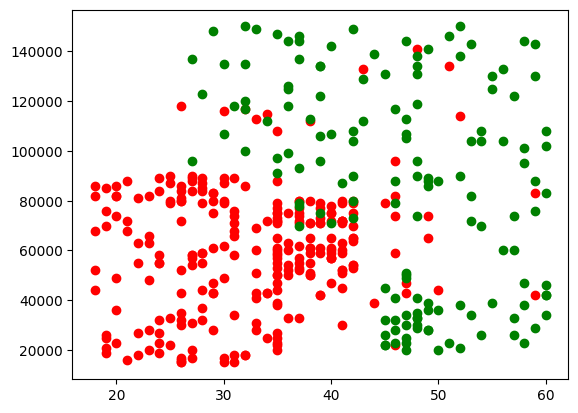

In [ ]:
#saçılım grafiğimizi çizdirdik
plt.scatter(S.yaş,S.maaş,color="red")
plt.scatter(B.yaş,B.maaş,color="green")

In [ ]:
#modeli oluşturduk ve eğitim ve test olarak böldük
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=23)

In [ ]:
#daha hassas sonuçlar için normalizasyon yapıyoruz
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
xtrain1 = sc.fit_transform(xtrain)
xtest1 = sc.transform(xtest)

In [ ]:
from sklearn.svm import SVC
sv=SVC(random_state=54)

In [ ]:
sv.fit(xtrain1,ytrain.ravel())

SVC(random_state=54)

In [ ]:
yhead = sv.predict(xtest1)

In [ ]:
sv.score(xtest1,ytest)

0.9166666666666666

In [ ]:
#confusion matrix ile kaç tane doğru kaç tan yanlış tahmin ettik ona bakarız
#ürünü satın almayanlardan 79 tane doğru ve 7 tane yanlış tahmin etmiş
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,yhead)
cm

array([[79,  7],
       [ 4, 42]])